In [1]:
### Imports ###
import os
import numpy as np 
import pandas as pd 

In [2]:
### Collect Simulation Data ###
dfs = []
data_folder = "data"
for f in os.listdir(data_folder):
    curr = pd.read_csv(f"{data_folder}/{f}", header=None, names=["qubits","ccz","seed","terms","time","tcounts"])
    curr.loc[0, "cat10"] = "cat10" in f
    dfs.append(curr)
full_data = pd.concat(dfs, ignore_index=True)
data = full_data.loc[:, ["ccz","seed","cat10","time"]]
data["time"] /= 1000    # convert milliseconds -> seconds
data.head()

,ccz,seed,cat10,time
0,100,1028,False,173.573
1,100,1077,False,181.413
2,100,1151,False,160.301
3,100,1162,False,139.460
4,100,1299,False,185.771


In [3]:
### Comparison at each size ###
data.groupby(["ccz","cat10"]).agg(
    avg_time=pd.NamedAgg("time", "mean"),
    std_time=pd.NamedAgg("time", np.std),
)

avg_time   std_time
ccz cat10                      
5   False    0.44566   0.055669
    True     0.43940   0.052583
10  False    1.54125   0.290804
    True     1.55263   0.301355
15  False    3.48617   0.831990
    True     3.50362   0.813739
20  False    5.45349   1.701075
    True     5.38703   1.642071
25  False    7.78937   2.298303
    True     7.81184   2.332607
30  False    9.54483   3.761446
    True     9.50737   3.609316
35  False   11.14694   4.379524
    True    11.19165   4.353333
40  False   13.65566   4.317850
    True    13.60238   4.174739
50  False   21.52161   4.933812
    True    21.50654   4.942413
60  False   39.15491   6.594902
    True    39.29057   6.459746
70  False   57.54275  11.651496
    True    57.34303  11.556284
80  False   77.22306  12.576132
    True    77.11966  12.890411
90  False  108.63146  17.761744
    True   108.00506  17.277225
100 False  167.13093  35.226107
    True   167.01102  34.560959

<AxesSubplot:xlabel='No. of CCZ Gates', ylabel='Time (s)'>

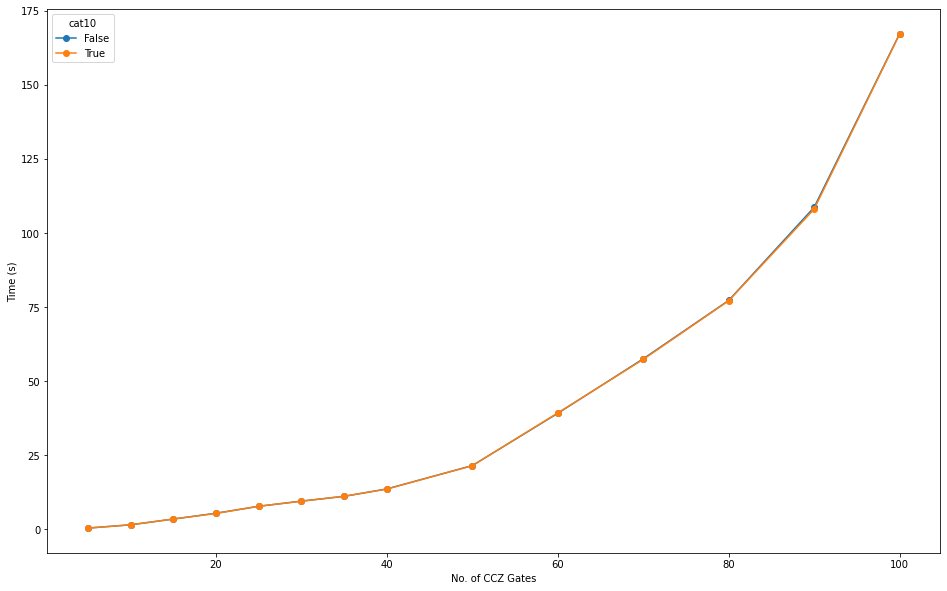

In [4]:
### Plot (No. of Gates vs. Average Simulation Time) ###
data.groupby(["ccz","cat10"]).mean().unstack()["time"].plot(
    xlabel="No. of CCZ Gates", 
    ylabel="Time (s)",
    marker="o",
    figsize=(16,10)
)

In [5]:
### Best Improvement and Worst Loss ###
diff_df = data.groupby(["ccz","seed","cat10"]).mean().unstack()["time"]
diff_df.loc[:, "diff"] = diff_df[False] - diff_df[True]
diff_df[["diff"]].groupby("ccz").agg(
    best_improvement=pd.NamedAgg("diff", "max"),
    worst_loss=pd.NamedAgg("diff", "min"),
    avg_diff=pd.NamedAgg("diff", "mean"),
    std_diff=pd.NamedAgg("diff", np.std),
)

,best_improvement,worst_loss,avg_diff,std_diff
ccz,,,,
5,0.124,-0.102,0.00626,0.039532
10,0.242,-0.253,-0.01138,0.115488
15,0.603,-0.702,-0.01745,0.269112
20,1.098,-0.797,0.06646,0.405435
25,0.945,-1.158,-0.02247,0.458159
30,1.989,-1.222,0.03746,0.538154
35,1.418,-1.214,-0.04471,0.532657
40,2.162,-1.631,0.05328,0.741278
50,2.067,-2.451,0.01507,0.948602


<AxesSubplot:ylabel='No. of CCZ Gates'>

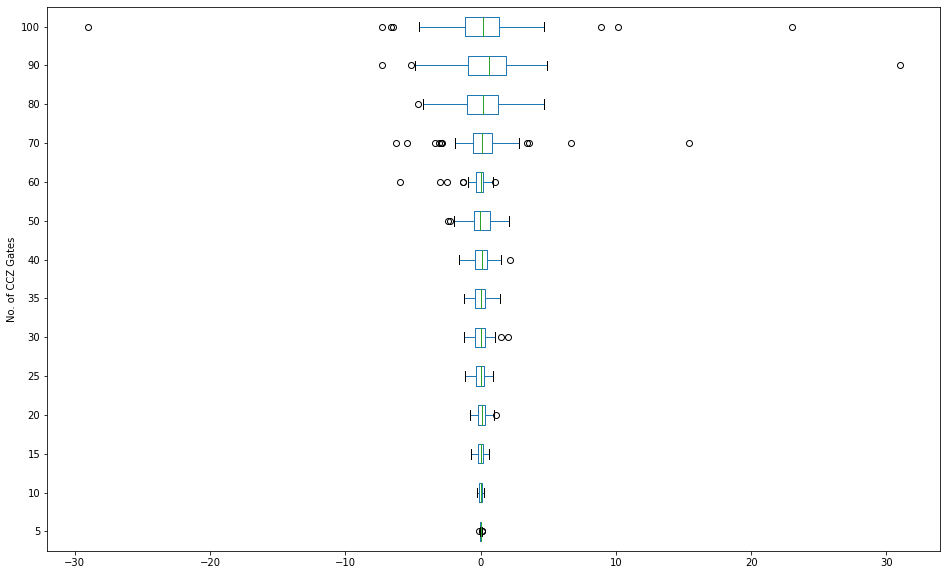

In [6]:
box_df = diff_df.groupby(["seed", "ccz"]).mean().unstack()["diff"]
box_df.plot.box(
    xlabel="Time Improvement",
    ylabel="No. of CCZ Gates",
    vert=False,
    figsize=(16,10),
)